# Bank Churn

# Pendahuluan

Industri Perbankan merupakan salah satu industri yang sangat kompetitif. Di setiap bank, ada dua pihak yang harus diperhatikan, yaitu nasabah dan investor. Nasabah, bagaimanapun, jelas merupakan bagian terpenting dari sebuah bank. Setiap nasabah menyediakan kebutuhan dasar untuk bank yaitu simpanan dan permintaan pinjaman, yang juga aliran pendapatan dari pendapatan bunga bersih. Hingga pada akhirnya bank mendapatkan 'fee income'. Bank menyediakan layanan intermediasi antara nasabah yang memiliki dana berlebih dengan nasabah yang mengalami defisit dana. Ia meminjam dan meminjamkan dari keseluruhan dana yang tersedia untuk menjaga keseimbangan keduanya. Memahami kebutuhan nasabah mereka dan bereaksi terhadap perubahan perilaku mereka, membantu bank menghadapi persaingan yang ketat. 

Peningkatan hubungan dengan pelanggan yang sudah ada merupakan hal yang sangat penting bagi bank, karena menarik pelanggan baru diketahui lebih mahal. Berdasarkan penelitian dari Athanassopoulos (2000), Kehilangan nasabah dan mendatangkan nasabah baru, memiliki efek lima sampai enam kali lebih mahal daripada mempertahankan (retensi) pelanggan. Van and Larivière (2004) Oleh karena itu, peningkatan kecil pada akurasi prediksi churn dapat menghasilkan keuntungan yang besar bagi perusahaan.

'Customer churn' adalah istilah yang digunakan di sektor perbankan yang mencoba untuk menunjukkan pergerakan pelanggan dari satu bank ke bank lain. Dalam industri perbankan, mengidentifikasi kemungkinan pelanggan churn semakin penting. Dalam domain perbankan, kami mendefinisikan 'customer churn' sebagai seseorang yang menutup semua akunnya dan berhenti berbisnis dengan bank. Ada banyak alasan bagi pelanggan untuk menutup akunnya.



# Rumusan Masalah

- Terdapat sejumlah nasabah meninggalkan bank diantara Top 5 Leading Banks in Europe* (France, Germany and Spain).
- Memprediksi nasabah mana yang meninggalkan bank.


# Tujuan

- Fokus mentargetkan nasabah mana yang kemungkinan besar pindah ke bank lain.
- Mencari pola nasabah dengan karakteristik seperti apa yang akan melakukan churn.

# Dataset
- Analisa dataset dari 10,000 nasabah di Tiga Negara Eropa Barat, yaitu Perancis, Jerman dan Spanyol.

**Source**
> Athanassopoulos, D.A. (2000), ‘‘Customer satisfaction cues to support market segmentation and
explain switching behaviour’’, Journal of Business Research, Vol. 47, pp. 191-207.

> https://www.statista.com/statistics/936590/leading-countries-in-europe-by-number-of-large-banks/

# Penjelasan Features

- CustomerId : contains random values, Id customer
- Surname : Customers surname
- CreditScore : Credit score per customer. A persons credit score is a number between 300 and 850, 850 being the highest credit rating possible
- Geography : a customer’s location. In this dataset: France, Germany, and Spain
- Gender : Female or Male
- Age
- Tenure : refers to the number of years that the customer has been a client of the bank. In this dataset, less than one year to 10 years
- Balance : Fund available in Bank
- NumOfProduct: Number of products that a customer has through the bank, between 1-4
- HasCrdCard : Customers who have a credit card, or not
- IsActiveMember : Whether an user is active or not
- EstimatedSalary : Estimated Salary each customer
- Exited: whether or not the customer left the bank. 1 - exited, 0 - Non exited

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sidetable as stb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = bankDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,RowNumber,int64,0,0.0,10000,"[8460, 5996]"
1,CustomerId,int64,0,0.0,10000,"[15585106, 15646513]"
2,Surname,object,0,0.0,2932,"[Kao, Grave]"
3,CreditScore,int64,0,0.0,460,"[554, 455]"
4,Geography,object,0,0.0,3,"[Germany, France]"
5,Gender,object,0,0.0,2,"[Male, Female]"
6,Age,int64,0,0.0,70,"[48, 25]"
7,Tenure,int64,0,0.0,11,"[6, 1]"
8,Balance,float64,0,0.0,6382,"[185267.45, 96020.86]"
9,NumOfProducts,int64,0,0.0,4,"[3, 2]"


In [6]:
# Features Numerikal dan kategorikal

num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print('===')
print(cat_var)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
===
['Surname', 'Gender', 'Geography']


In [7]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Statistik deskriptif untuk data numerik

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Statistik deskriptif untuk data kategorikal (tipe data object)

df.describe(include = 'O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Batas minimal gaji adalah 1,002 euro
- jadi saya akan mengganti value tersebut dengan rata-rata atau mean dari dataset ini.

https://en.wikipedia.org/wiki/List_of_European_countries_by_minimum_wage

In [10]:
df[df['EstimatedSalary'] < 1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
149,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
925,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
982,668,France,Male,32,7,0.00,2,1,1,777.37,0
1139,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


In [11]:
value = [11.58, 90.07, 91.75, 96.27, 
         142.81, 178.19, 106.67, 123.07, 143.34,
        216.27, 236.45, 247.36, 287.99, 
        371.05, 343.38, 332.81,
        417.41, 447.73, 440.20, 428.23, 479.54,487.30, 468.94,
        582.53, 598.80, 548.52, 523.00, 502.70, 582.59, 555.28, 
        600.36, 676.06, 653.58, 667.66, 683.37, 690.84, 645.61, 
        705.18, 777.37, 753.37, 735.79, 738.88, 747.88, 706.50, 
        878.87, 823.36, 820.46, 807.06, 823.96, 861.40, 824.00, 898.51,
         961.57, 944.41, 937.15, 933.38, 980.93, 994.86, 978.66
        ]

mean = df['EstimatedSalary'].mean()
df['EstimatedSalary'].replace([value], mean, inplace=True)

In [12]:
df[df['EstimatedSalary'] < 1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100677.439010,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,56997.056874,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1002.390000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,52275.572500,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df_clean = df.copy()
df_clean.to_csv('bank_churn_clean.csv', index = False)

# Exploratory Data Analysis

In [15]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100677.439010,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,56997.056874,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1002.390000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,52275.572500,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dari deskripsi diatas, diketahui :
- Credit score rata-rata nasabah 650 dengan range skor kredit antara 350 hingga 850.
- Rata-rata umur nasabah 39 tahun, dengan umur termuda 18 tahun dan tertua 92 tahun.
- Rata-rata nasabah sudah menjadi nasabah selama 5 tahun.
- Balance di bank rata-rata sebanyak 76,486 euro.
- Nasabah menggunakan setidaknya 1 produk yang ditawarkan oleh bank.

In [17]:
# Statistik deskriptif untuk data kategorikal (tipe data object)

df_clean.describe(include = 'O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Dari data deskripsi untuk tipe data objek,
- Kebanyakan nasabah berasal dari negara Perancis
- Jenis kelamin nasabah mayoritas Laki-laki.

In [18]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Korelasi Heatmap

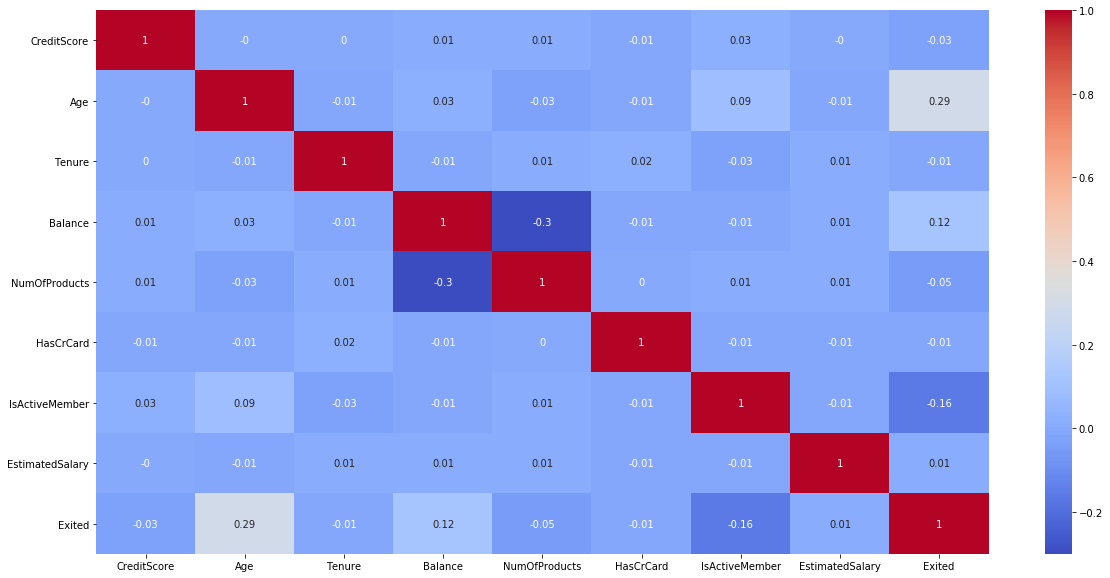

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

Hasil :
- Korelasi terbalik antara features IsActiveMember, NumOfProducts, CreditScore, Tenure dan HasCrCard dengan Exited
- Korelasi searah antara features EstimatedSalary, Balance dan Age dengan Exited

# Univariat

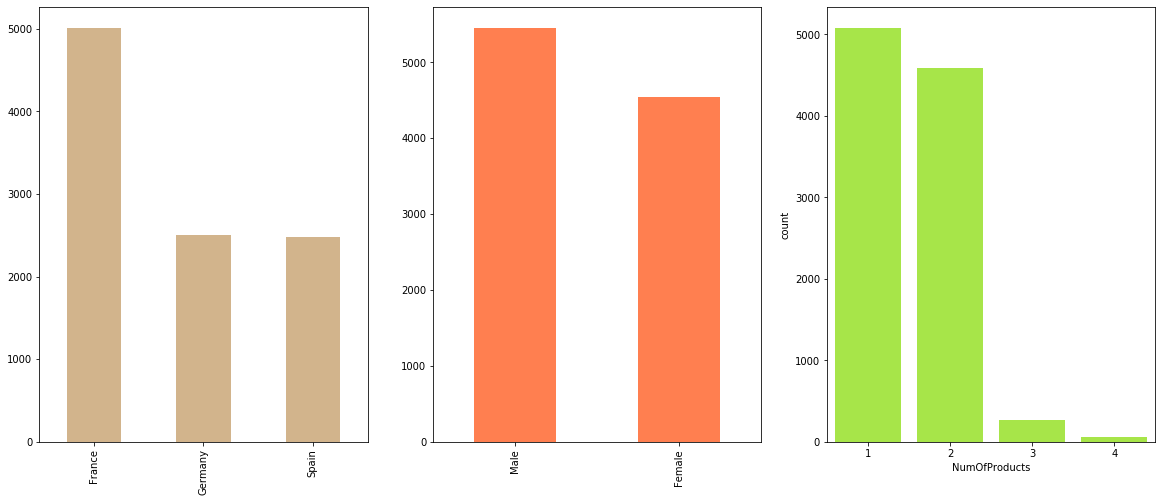

In [20]:
# Geography, Gender, NumOfProducts

f = plt.figure(figsize=(20,8))
f.add_subplot(1,3,1)
df_clean['Geography'].value_counts().plot(kind='bar', color='tan')
f.add_subplot(1,3,2)
df_clean['Gender'].value_counts().plot(kind='bar', color='coral')
f.add_subplot(1,3,3)
sns.countplot(df_clean['NumOfProducts'], color='greenyellow')


Hasil :
- Melihat pengaruh jenis kelamin sebagai variabel demografis pelanggan. Hasil penelitian ini sejalan dengan penelitian Buckinx dan Van den Poel (2005) dan Clemes et al. (2010) yang membuat daftar variabel demografis terkait pelanggan (misalnya, pendapatan, usia, pendidikan, budaya, dan kewarganegaraan)

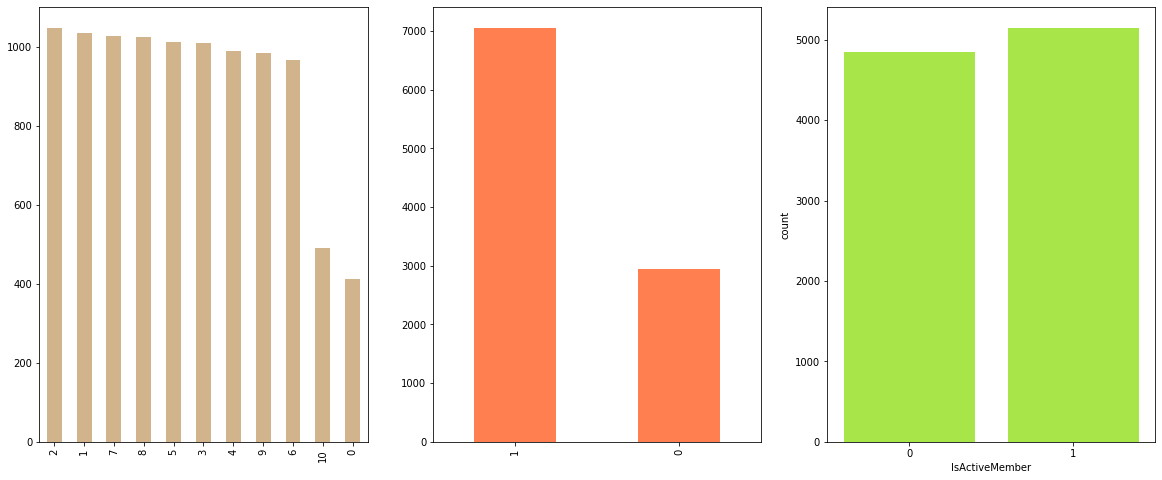

In [21]:
# Tenure, HasCrCard, IsActiveMember

f = plt.figure(figsize=(20,8))
f.add_subplot(1,3,1)
df_clean['Tenure'].value_counts().plot(kind='bar', color='tan')
f.add_subplot(1,3,2)
df_clean['HasCrCard'].value_counts().plot(kind='bar', color='coral')
f.add_subplot(1,3,3)
sns.countplot(df_clean['IsActiveMember'], color='greenyellow')

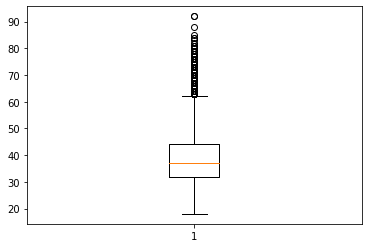

In [22]:
plt.boxplot(df_clean['Age'])
plt.savefig('Age.png')
plt.show()

Hasil :
- Usia nasabah bervariasi dari 18 tahun hingga 90 tahunan.
- Median usia nasabah ada digaris kuning, jika dilihat dari statistik deskripsi, median usia nasabah adalah 37 tahun.

In [23]:
df_clean.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Hasil :
- Nasabah yang berlokasi di negara Perancis paling banyak dengan 5014 nasabah, kemudian Jerman dan Spanyol.

In [24]:
df_clean.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [25]:
df_clean.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Hasil :
- Lama nasabah bergabung dengan bank bervariasi dari kurang dari setahun hingga 10 tahun, namun paling banyak nasabah telah bergabung selama 2 tahun.

In [26]:
df_clean.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [27]:
df_clean.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [28]:
df_clean['IsActiveMember'].value_counts(normalize = True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

Hasil :
- 50% nasabah merupakan nasabah aktif di bank.

In [29]:
df_clean.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [30]:
df_clean['NumOfProducts'].value_counts(normalize = True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

Hasil :
- Lebih dari 95% nasabah memiliki 1-2 produk yang ditawarkan oleh bank

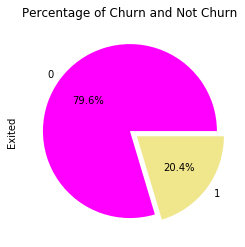

In [31]:
# Exited

count = df_clean['Exited'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['magenta','khaki'], figsize = (4,4),explode = [0,0.1],title = "Percentage of Churn and Not Churn")
plt.show()

In [32]:
df_clean['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Hasil :
- Nasabah loyal sekitar 80%.

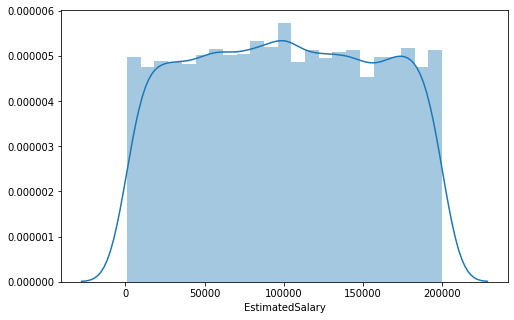

In [33]:
# Estimate Salary

plt.figure(figsize = (8,5))
sns.distplot(df_clean.EstimatedSalary)
plt.show()

In [34]:
df_clean['EstimatedSalary'].value_counts(normalize = True)

100090.239881    0.0059
24924.920000     0.0002
181964.600000    0.0001
21254.060000     0.0001
185992.360000    0.0001
                  ...  
43036.600000     0.0001
55034.020000     0.0001
13159.900000     0.0001
144390.750000    0.0001
104181.780000    0.0001
Name: EstimatedSalary, Length: 9941, dtype: float64

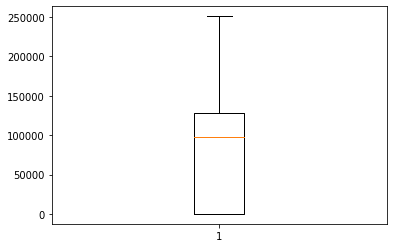

In [35]:
# Balance

plt.boxplot(df_clean['Balance'])
plt.show()

In [36]:
pd.crosstab(df_clean['Balance'], columns='count', normalize=True)

col_0,count
Balance,
0.00,0.3617
3768.69,0.0001
12459.19,0.0001
14262.80,0.0001
16893.59,0.0001
...,...
216109.88,0.0001
221532.80,0.0001
222267.63,0.0001


Hasil :
- Nasabah yang tidak memiliki saldo bank ada 36%, selebihnya sekitar 0.1%

In [37]:
# Grouping beberapa features

# Credit Score
df_clean["CreditScore_group"] = pd.cut(df_clean.CreditScore, bins=[349, 579, 669, 739, 799, 850],
                                 labels = ['Poor Credit Score','Fair','Good', "Very Good", 'Exceptional'])

# Age
df_clean["Age_group"] = pd.cut(df_clean.Age, bins=[18,21,37,53,92], 
                         labels = ['Gen Z', 'Millenials', 'Gen X', "Baby Boomers"])

# Balance
df_clean["Balance_group"] = pd.cut(df_clean.Balance, bins=[0,50000,100000,150000,200000,260000], 
                             labels = ['0-50000', '50001-100000', '100001-150000', "150001-200000", '200000 Plus'])

# EstimatedSalary
df_clean["EstimatedSalary_group"] = pd.cut(df_clean.EstimatedSalary, bins=[0,50000,100000,150000,200000], 
                                     labels = ['Penghasilan Rendah', 'Menengah', 'Menengah Keatas', 'Tinggi'])

Saya melakukan grouping :

- Credit Score berdasarkan standar dari FICO
    - < 580 : Poor
    - 580 - 669 : Fair
    - 670 - 739 : Good
    - 740 - 799 : Very Good
    - 800 - more : Exceptional
    
- Umur berdasarkan Alvara Research Center :
    - Gen Z : 17-21 tahun
    - Millennial : 22-37 tahun
    - Gen X : 38-53 tahun
    - Baby Boomers : Diatas 53 tahun

> source : FICO https://www.investopedia.com/terms/f/ficoscore.asp

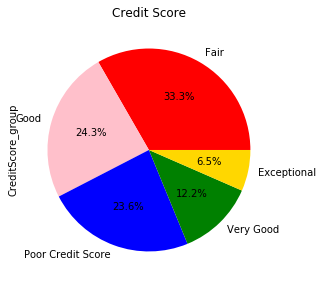

In [38]:
plt.subplot(1,2,2)
count = df_clean['CreditScore_group'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['red','pink', 'blue', 'green', 'gold'], figsize = (10,7),title = "Credit Score")
plt.title('Credit Score')
plt.savefig('CreditScore_group.png')
plt.show()

# Analisa Multivariat ( Two Features )

In [39]:
# Exited dan Rata-rata Balance

df_clean.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

Hasil :
- Rata-rata saldo untuk nasabah churn lebih tinggi dari rata-rata saldo nasabah yang retained

In [40]:
# Grup CreditScore dan Exited

df_clean.groupby('CreditScore_group')['Exited'].mean()

CreditScore_group
Poor Credit Score    0.220152
Fair                 0.205644
Good                 0.186161
Very Good            0.205882
Exceptional          0.195420
Name: Exited, dtype: float64

Hasil :
- Berdasarkan rata-rata kredit skor grup, nasabah dengan poor skor kredit memiliki tingkat churn paling tinggi (22%)

In [41]:
# Usia dan Exited

df_clean.groupby('Age')['Exited'].count().sort_values(ascending = False).head()/len(df_clean.index)

Age
37    0.0478
38    0.0477
35    0.0474
36    0.0456
34    0.0447
Name: Exited, dtype: float64

Hasil :
- Nasabah dengan umur 30 tahunan lebih cenderung churn.

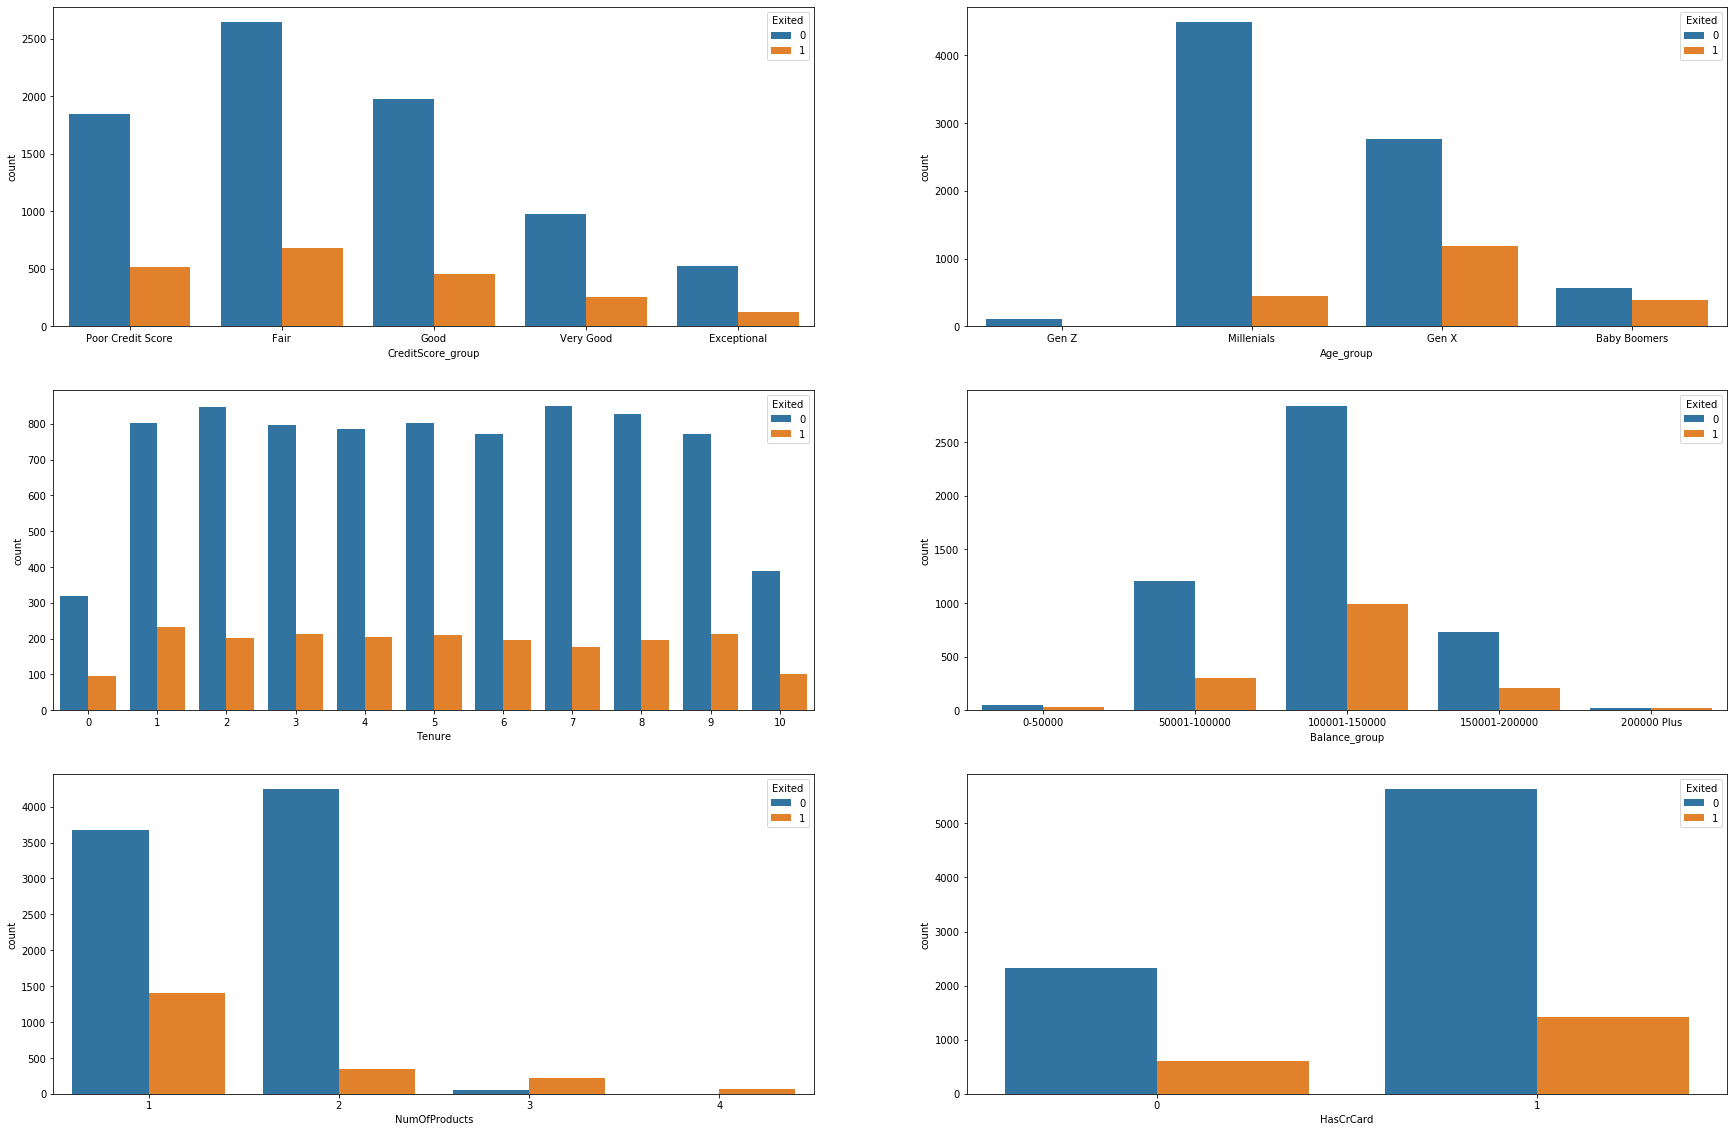

In [42]:
# Behavior of Exited customers for various categorical features
fig, axarr = plt.subplots(3,2, figsize=(30,20))
# plt.figure(figsize=(15,5))

# Credit Score
sns.countplot(x='CreditScore_group', hue = 'Exited', data = df_clean, ax=axarr[0][0])


# Age
sns.countplot(x='Age_group', hue = 'Exited', data = df_clean, ax=axarr[0][1])


# Tenure
sns.countplot(x='Tenure', hue = 'Exited', data = df_clean, ax=axarr[1][0])


# Balance
sns.countplot(x='Balance_group', hue = 'Exited', data = df_clean, ax=axarr[1][1])


# Number of Products
sns.countplot(x='NumOfProducts', hue = 'Exited', data = df_clean, ax=axarr[2][0])


# Has Credit Card
sns.countplot(x='HasCrCard', hue = 'Exited', data = df_clean, ax=axarr[2][1])


Hasil :
- Pola nasabah yang bertahan menjadi nasabah dengan yang pindah ke bank lain sama, dari banyak nasabah yang memiliki skor kredit 'Poor' ke 'Fair' mengalami kenaikan, namun selanjutnya menurun.
- Usia nasabah yang pindah bank lain terbanyak adalah generasi X, sedangkan yang setia terbanyak generasi Millennial.
- Nasabah yang memiliki dana (balance) dibank sekitar 100,000 hingga 150,000 euro cenderung berpindah bank.
- Jumlah produk yang digunakan nasabah paling banyak adalah satu hingga dua produk. Namun, nasabah dengan produk bank hanya satu akan pindah ke bank lain.
- Dengan menjual produk tambahan kepada nasabah, jika nasabah hanya memiliki satu produk sehingga bank dapat meningkatkan loyalitas mereka (kita telah melihat bahwa nasabah yang lebih loyal adalah mereka yang menggunakan minimal dua produk bank).
- Seseorang yang telah menggunakan produk bank dalam durasi waktu satu hingga sembilan tahun, akan berpindah.
- Lebih banyak nasabah yang mempunyai kartu kredit akan keluar.

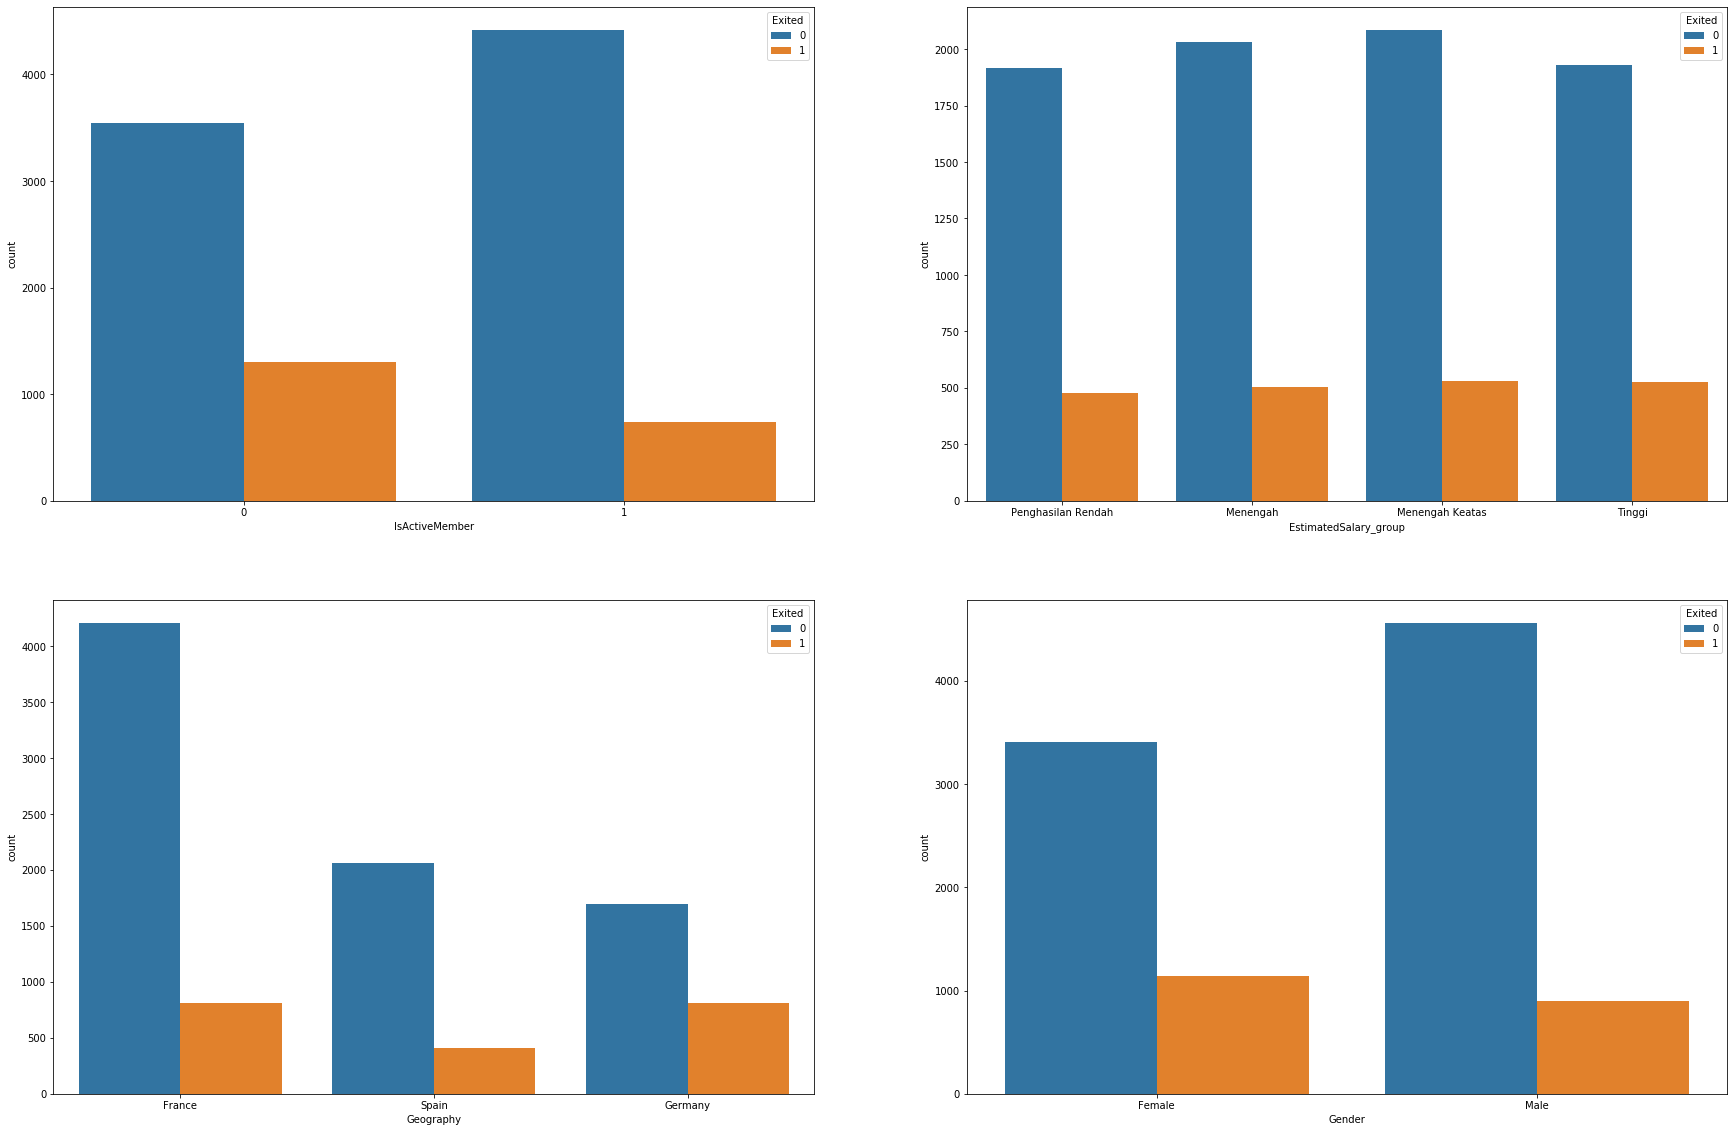

In [43]:
fig, axarr = plt.subplots(2,2, figsize=(30,20))
# plt.figure(figsize=(15,5))

# Active Member
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df_clean, ax=axarr[0][0])


# EstimatedSalary
sns.countplot(x='EstimatedSalary_group', hue = 'Exited', data = df_clean, ax=axarr[0][1])


# Geography
sns.countplot(x='Geography', hue = 'Exited', data = df_clean, ax=axarr[1][0])


# Gender
sns.countplot(x='Gender', hue = 'Exited', data = df_clean, ax=axarr[1][1])

Hasil :
- Nasabah yang tidak aktif akan berpindah ke bank lain.
- Estimasi penghasilan nasabah yang churn dengan penghasilan menengah keatas.
- Nasabah dari negara Perancis dan Jerman cenderung tidak loyal dan akan mencari bank lain.
- Lebih banyak nasabah wanita yang berpindah ke bank lain daripada pria.
- Bank dapat meningkatkan pemasarannya dengan memfokuskan upaya dalam persuasi kepada nasabah agar tetap berada di bank pada klien demografis tertentu terutama nasabah wanita, kewarganegaraan Jerman dan Prancis.

In [44]:
# Credit Score dan Exited

pd.crosstab(df_clean['CreditScore_group'], df_clean['Exited'], normalize = True)

Exited,0,1
CreditScore_group,,
Poor Credit Score,0.1842,0.0520
Fair,0.2646,0.0685
Good,0.1976,0.0452
Very Good,0.0972,0.0252
Exceptional,0.0527,0.0128


In [45]:
pd.crosstab(df_clean['CreditScore_group'], df_clean['Exited'])

Exited,0,1
CreditScore_group,,
Poor Credit Score,1842,520
Fair,2646,685
Good,1976,452
Very Good,972,252
Exceptional,527,128


Hasil :
- Nasabah dengan kredit skor 'Fair' churn.

In [46]:
# Grup Age dan Exited

pd.crosstab(df_clean['Age_group'], df_clean['Exited'])

Exited,0,1
Age_group,,
Gen Z,114,6
Millenials,4491,454
Gen X,2765,1182
Baby Boomers,573,393


In [47]:
pd.crosstab(df_clean['Age_group'], df_clean['Exited'], normalize = True)

Exited,0,1
Age_group,,
Gen Z,0.011425,0.000601
Millenials,0.450090,0.045500
Gen X,0.277110,0.118461
Baby Boomers,0.057426,0.039387


In [48]:
pd.crosstab(df_clean['Age'].mean(), df_clean['Exited'], normalize = True)

Exited,0,1
row_0,,
38.9218,0.7963,0.2037


Hasil :
- Generasi X merupakan grup usia dengan jumlah churn paling banyak, yaitu 1182 orang, kemudian generasi Millenials, Baby Boomers dan generasi Z
- Dari rata-rata usia nasabah 39 tahun, 20,37% melakukan churn.


In [49]:
# Gender dan Exited

pd.crosstab(df_clean['Gender'], df_clean['Exited'], normalize = True)

Exited,0,1
Gender,,
Female,0.3404,0.1139
Male,0.4559,0.0898


Hasil :
- Nasabah yang tidak aktif cenderung akan pindah ke bank lain.
- Nasabah dari negara Jerman dan Perancis akan pindah dengan bank lain.
- Nasabah pria cenderung tidak akan pindah ke bank lain (46%), hal tersebut berbanding terbalik dengan nasabah wanita.
- 11,4% wanita lebih memilih pindah ke bank lain

In [50]:
# Geography dan Exited

pd.crosstab(df_clean['Geography'], df_clean['Exited'], normalize = True)

Exited,0,1
Geography,,
France,0.4204,0.0810
Germany,0.1695,0.0814
Spain,0.2064,0.0413


In [51]:
pd.crosstab(df_clean['Geography'], df_clean['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


Hasil :
- Data nasabah yang pindah ke bank lain paling tinggi berasal dari nasabah Jerman dan Perancis

In [52]:
# Tenure dan Exited

pd.crosstab(df_clean['Tenure'], df_clean['Exited'], normalize = True)


Exited,0,1
Tenure,,
0,0.0318,0.0095
1,0.0803,0.0232
2,0.0847,0.0201
3,0.0796,0.0213
4,0.0786,0.0203
5,0.0803,0.0209
6,0.0771,0.0196
7,0.0851,0.0177
8,0.0828,0.0197


In [53]:
pd.crosstab(df_clean['Tenure'], df_clean['Exited'])

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


Hasil :
- Nasabah dengan masa bergabung 1 tahun memiliki tingkat churn sebesar 2,32% 

In [54]:
# Balance_group dan Exited
pd.crosstab(df_clean['Balance_group'], df_clean['Exited'])

Exited,0,1
Balance_group,,
0-50000,49,26
50001-100000,1209,300
100001-150000,2843,987
150001-200000,730,205
200000 Plus,15,19


In [55]:
pd.crosstab(df_clean['Balance_group'], df_clean['Exited'], normalize = True)

Exited,0,1
Balance_group,,
0-50000,0.007677,0.004073
50001-100000,0.189409,0.047000
100001-150000,0.445402,0.154629
150001-200000,0.114366,0.032117
200000 Plus,0.002350,0.002977


Hasil :
- Ada 15,5% nasabah dengan saldo di bank antara 100,000 - 150,000 yang melakukan churn ke bank lain.

In [56]:
# Exited dan Jumlah produk

pd.crosstab(index = df_clean['Exited'], columns = df_clean['NumOfProducts'], normalize = 'columns')

NumOfProducts,1,2,3,4
Exited,,,,
0,0.722856,0.924183,0.172932,0.0
1,0.277144,0.075817,0.827068,1.0


In [57]:
pd.crosstab(df_clean['NumOfProducts'], df_clean['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


Hasil :
- Tingkat retensi nasabah 92% jika nasabah mempunyai 2 produk dari bank.
- Jika nasabah memiliki produk yang ditawarkan bank lebih dari 2 produk, maka nasabah akan pindah ke bank lain.
- Tidak ada nasabah yang menetap jika memiliki 4 produk.

In [58]:
# HasCrCard dan Exited

pd.crosstab(df_clean['HasCrCard'], df_clean['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [59]:
pd.crosstab(df_clean['HasCrCard'], df_clean['Exited'], normalize = True)

Exited,0,1
HasCrCard,,
0,0.2332,0.0613
1,0.5631,0.1424


Hasil :
- 14% nasabah yang mempunyai kartu kredit akan berpindah ke bank lain.

In [60]:
# IsActiveMember dan Exited

pd.crosstab(df_clean['IsActiveMember'], df_clean['Exited'])

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [61]:
pd.crosstab(df_clean['IsActiveMember'], df_clean['Exited'], normalize = True)

Exited,0,1
IsActiveMember,,
0,0.3547,0.1302
1,0.4416,0.0735


Hasil :
- Nasabah yang tidak aktif akan berpindah ke bank lain sebesar 13%

In [62]:
# EstimatedSalary_group dan Exited

pd.crosstab(df_clean['EstimatedSalary_group'], df_clean['Exited'])

Exited,0,1
EstimatedSalary_group,,
Penghasilan Rendah,1918,476
Menengah,2033,504
Menengah Keatas,2084,530
Tinggi,1928,527


In [63]:
pd.crosstab(df_clean['EstimatedSalary_group'], df_clean['Exited'], normalize = 'columns')

Exited,0,1
EstimatedSalary_group,,
Penghasilan Rendah,0.240864,0.233677
Menengah,0.255306,0.247423
Menengah Keatas,0.261710,0.260187
Tinggi,0.242120,0.258714


Hasil :
- Nasabah dengan penghasilan menengah keatas akan memilih meninggalkan bank, lalu penghasilan tinggi, menengah dan yang terakhir nasabah berpenghasilan rendah.
- Sedangkan nasabah loyal jika diurut berdasarkan penghasilan, penghasilan menengah keatas, menengah, tinggi dan rendah.

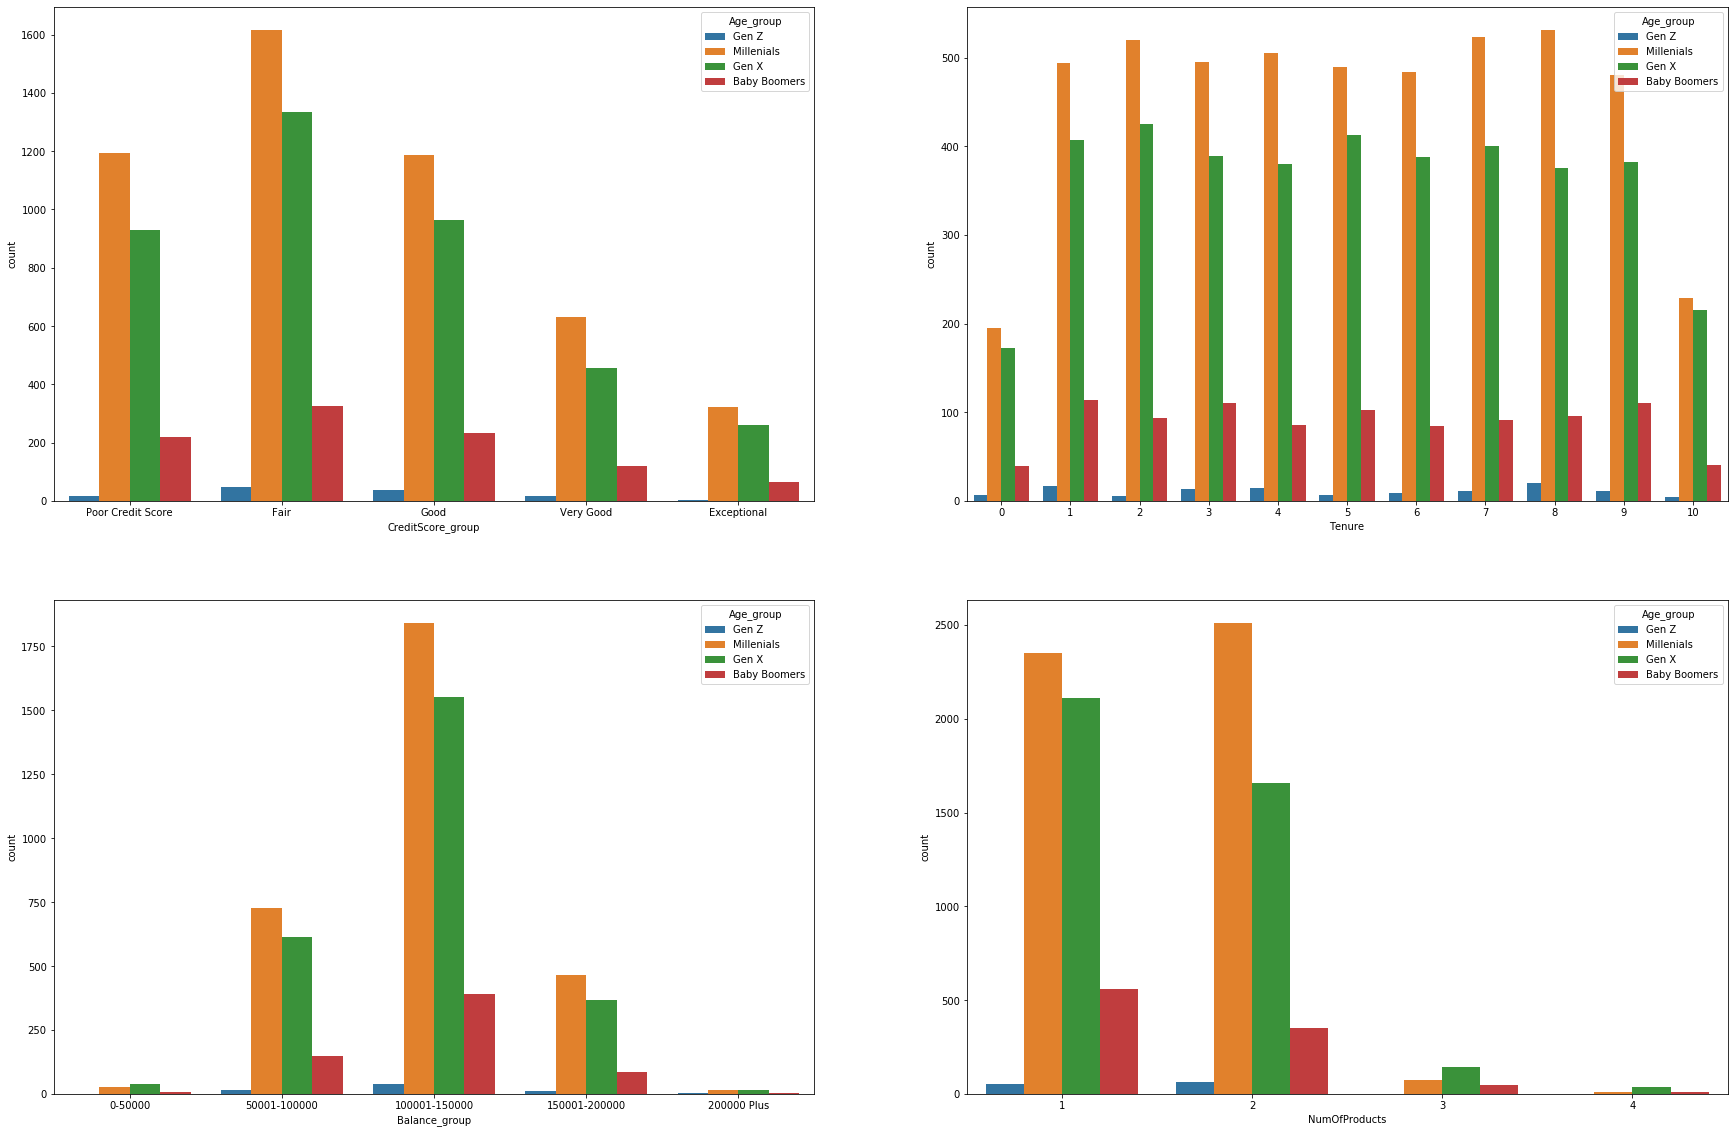

In [64]:
# Perilaku nasabah berdasarkan grup usia terhadap features lainnya

fig, axarr = plt.subplots(2,2, figsize=(30,20))
# plt.figure(figsize=(15,5))

# Credit Score
sns.countplot(x='CreditScore_group', hue = 'Age_group', data = df_clean, ax=axarr[0][0])


# Tenure
sns.countplot(x='Tenure', hue = 'Age_group', data = df_clean, ax=axarr[0][1])


# Balance
sns.countplot(x='Balance_group', hue = 'Age_group', data = df_clean, ax=axarr[1][0])


# Number of Products
sns.countplot(x='NumOfProducts', hue = 'Age_group', data = df_clean, ax=axarr[1][1])

Hasil :
- Nasabah dengan kredit skor Fair dan Poor, ada dalam kelompok generasi millennial.
- Ada lebih banyak generasi Millenials sudah menjadi nasabah selama 8 tahun.
- Pada kelompok saldo bank, Generasi Millenial dan X memiliki saldo dengan range 100,000-150,000 euro terbanyak.
- Millennial dan Generasi X lebih mendominasi pada feature grup skor kredit, tenure, dan dana tersedia (balance) di bank
- Jumlah nasabah yang memiliki produk 1-2 terbanyak ada di grup usia nasabah Millenials.
- Tidak ada nasabah dari generasi Baby Boomers yang memiliki produk bank lebih dari dua.

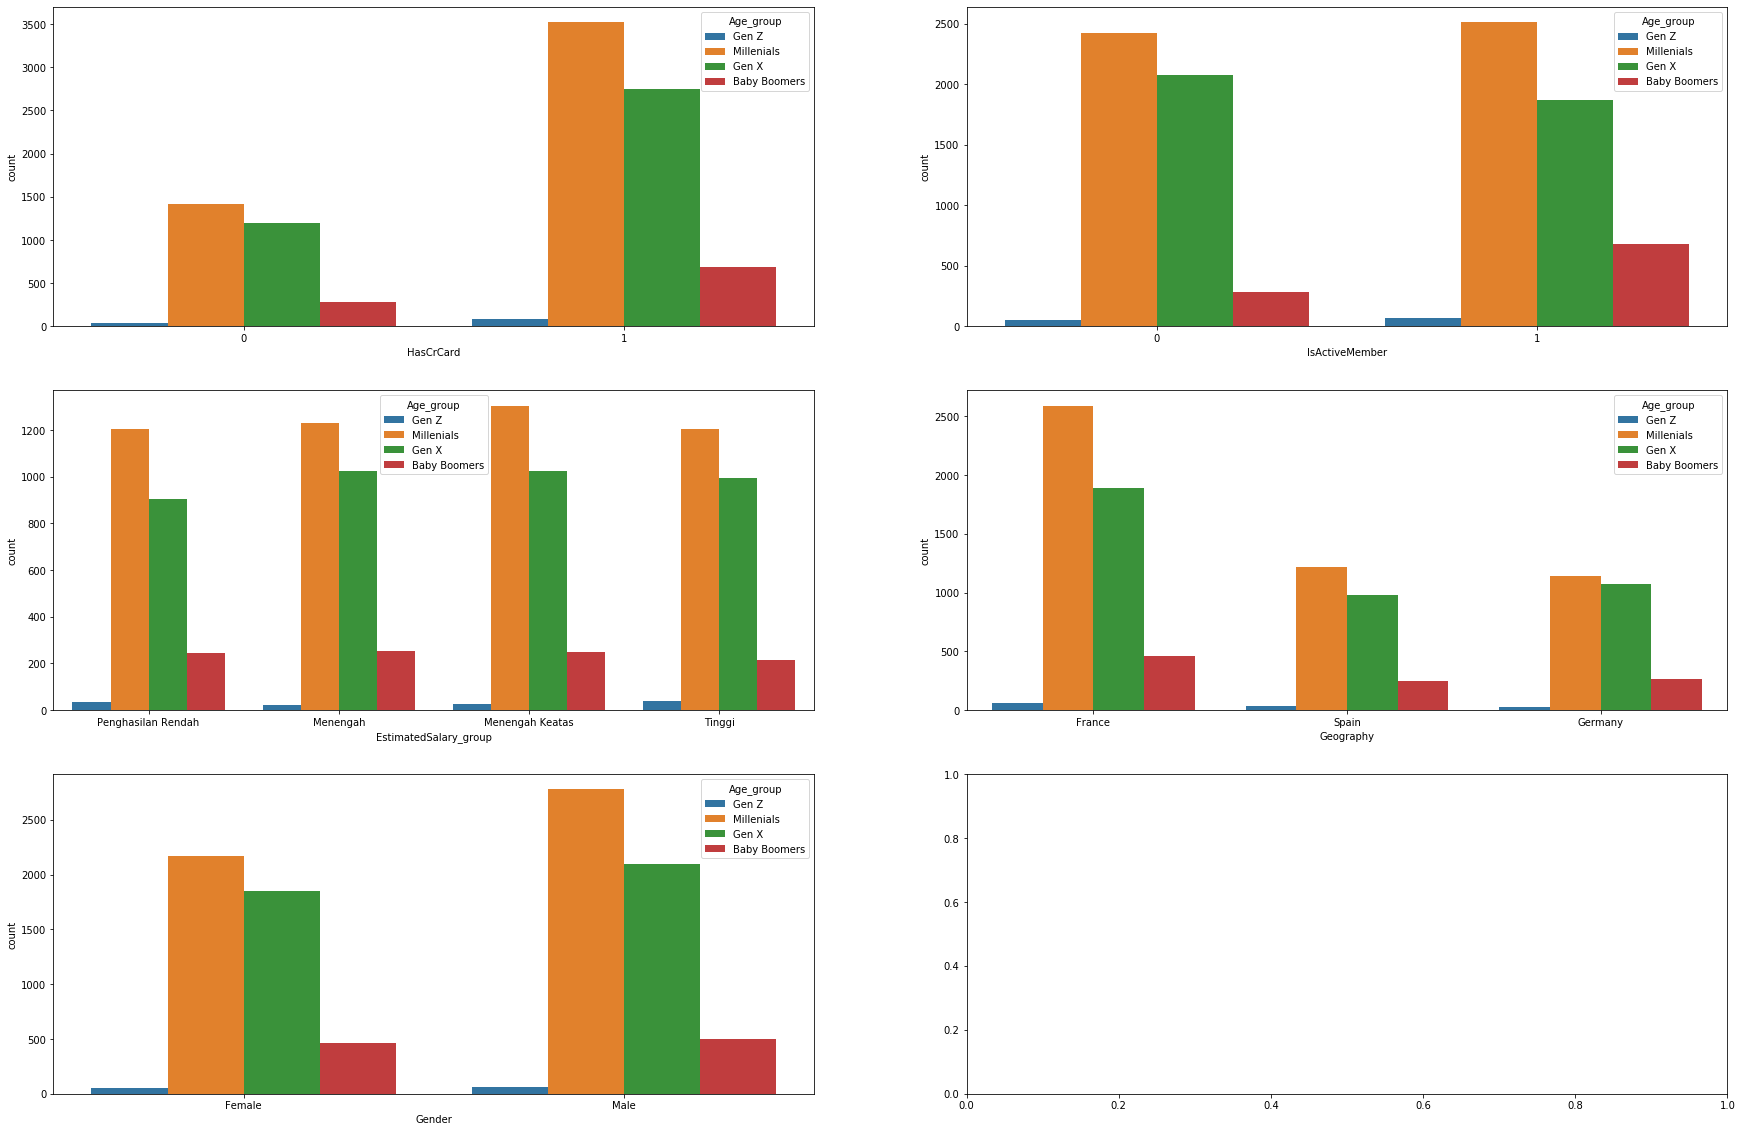

In [65]:
# Perilaku nasabah berdasarkan grup usia terhadap features lainnya (1)

fig, axarr = plt.subplots(3,2, figsize=(30,20))
# plt.figure(figsize=(15,5))


# Has Credit Card
sns.countplot(x='HasCrCard', hue = 'Age_group', data = df_clean, ax=axarr[0][0])


# Active Member
sns.countplot(x='IsActiveMember', hue = 'Age_group', data = df_clean, ax=axarr[0][1])


# EstimatedSalary
sns.countplot(x='EstimatedSalary_group', hue = 'Age_group', data = df_clean, ax=axarr[1][0])


# Geography
sns.countplot(x='Geography', hue = 'Age_group', data = df_clean, ax=axarr[1][1])


# Gender
sns.countplot(x='Gender', hue = 'Age_group', data = df_clean, ax=axarr[2][0])

Hasil :
- Lebih banyak nasabah yang memiliki kartu kredit diseluruh grup usia.
- Nasabah generasi Baby Boomers lebih banyak yang aktif, sedangkan generasi X lebih tidak aktif.
- Generasi Z, Millennial dan Baby Boomers terbanyak berasal dari negara Perancis.
    - Generasi X terbanyak setelah negara Perancis, berasal dari Jerman.
- Nasabah laki-laki lebih banyak di usia millennial, sedangkan gender wanita dari generasi Baby Boomers paling sedikit.

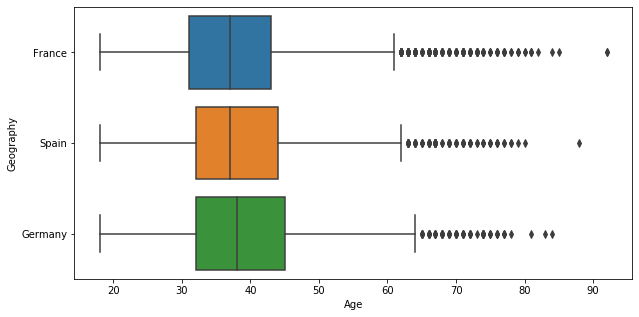

In [66]:
plt.figure(figsize = (10,5))
sns.boxplot(y = df_clean['Geography'], x = df_clean['Age'])

Hasil :
- Nasabah paling tua berasal dari Perancis

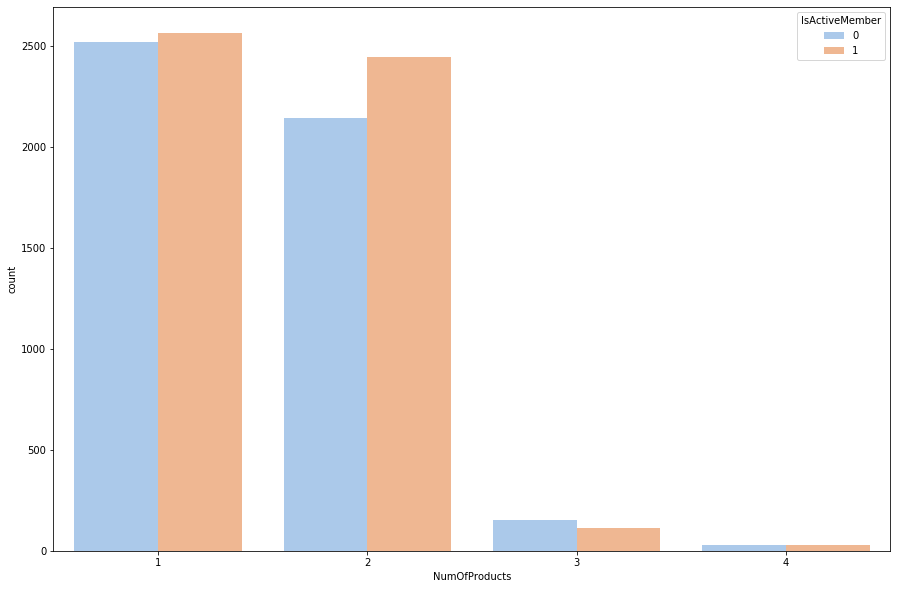

In [67]:
plt.figure(figsize = (15, 10))
sns.countplot(df_clean['NumOfProducts'], hue = df_clean['IsActiveMember'], palette = 'pastel')
plt.show()

Hasil:
- Mayoritas nasabah memiliki produk bank antara 1-2.
- Member yang aktif terbanyak menggunakan dua produk dari bank.

# Analisa Multivariat ( Three Features )

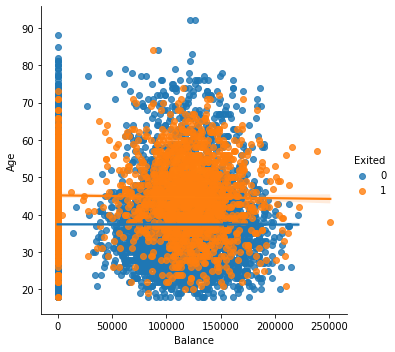

In [68]:
sns.lmplot(x = 'Balance', y = 'Age', data = df_clean, hue = 'Exited')

In [69]:
# Gender, Exited dan Grup CreditScore

pd.crosstab(index = df_clean['Gender'], columns = [df_clean['Exited'], df_clean['CreditScore_group']], normalize = 'columns').round(2)

Exited                            0                                    \
CreditScore_group Poor Credit Score  Fair  Good Very Good Exceptional   
Gender                                                                  
Female                         0.43  0.42  0.43      0.43        0.43   
Male                           0.57  0.58  0.57      0.57        0.57   

Exited                            1                                    
CreditScore_group Poor Credit Score  Fair  Good Very Good Exceptional  
Gender                                                                 
Female                         0.52  0.58  0.57      0.58        0.54  
Male                           0.48  0.42  0.43      0.42        0.46

Hasil :
- 58% nasabah wanita dengan skor kredit 'Fair' dan 'Very Good' berpindah bank diantara seluruh grup skor kredit.
    - Untuk Laki-laki, 48% akan berpindah bank karena memiliki skor kredit rendah (poor).
- Nasabah pria dengan skor kredit 'Fair' mempunyai tingkat persentase paling tinggi untuk tetap menggunakan layanan bank.
- Secara umum, nasabah pria memiliki persentase tertinggi untuk tidak berpindah bank dibandingkan nasabah wanita.

In [70]:
# Gender, Exited dan rata-rata usia

pd.crosstab(index = df_clean['Gender'], columns = df_clean['Exited'], values = df_clean['Age'], aggfunc = 'median')

Exited,0,1
Gender,,
Female,36,45
Male,36,45


Hasil :
- Untuk nasabah pria dan wanita median usia untuk berpindah bank adalah 45 tahun, sedangkan tetap dengan bank pada usia 36 tahun.
- Nasabah yang berpindah bank memiliki median umur lebih tua daripada nasabah yang loyal.

In [71]:
# Gender, Exited dan Geography

pd.crosstab(index = df_clean['Gender'], columns = [df_clean['Exited'], df_clean['Geography']], normalize = 'columns' )

Exited            0                             1                    
Geography    France   Germany     Spain    France   Germany     Spain
Gender                                                               
Female     0.428402  0.439528  0.415698  0.567901  0.550369  0.559322
Male       0.571598  0.560472  0.584302  0.432099  0.449631  0.440678

Hasil :
- Nasabah wanita dari negara Perancis memiliki tingkat churn paling besar.
- Nasabah Pria dari Spanyol, lebih mungkin tidak berpindah bank.

In [72]:
# Gender, Exited dan Number of Products

pd.crosstab(index = df_clean['Gender'], columns = [df_clean['Exited'], df_clean['NumOfProducts']], normalize = 'columns')

Exited                0                             1                      \
NumOfProducts         1         2         3         1         2         3   
Gender                                                                      
Female         0.417415  0.436115  0.434783  0.540809  0.603448  0.586364   
Male           0.582585  0.563885  0.565217  0.459191  0.396552  0.413636   

Exited                   
NumOfProducts         4  
Gender                   
Female         0.633333  
Male           0.366667

Hasil :
- Tidak ada nasabah yang loyal dengan bank jika ia memiliki 4 produk.

In [73]:
# Exited, rata-rata umur, rata-rata balance/saldo

pd.crosstab(index = df_clean['Exited'], columns = [df_clean['Age'].mean(), df_clean['Balance'].mean()])

col_0,38.9218
col_1,76485.889288
Exited,
0,7963
1,2037


Hasil :
- Ada 2.037 nasabah dengan rata-rata umur 39 tahun dan balance 76,846 euro yang churn.

In [74]:
pd.crosstab(index = df_clean['Exited'], columns = [df_clean['IsActiveMember'], df_clean['NumOfProducts']])

IsActiveMember     0                    1              
NumOfProducts      1     2    3   4     1     2   3   4
Exited                                                 
0               1597  1932   18   0  2078  2310  28   0
1                924   212  135  31   485   136  85  29

Hasil :
- Ada 2310 nasabah loyal (tidak berpindah ke bank lain) yang memiliki 2 produk yang ditawarkan bank dan member aktif.
- Sedangkan nasabah yang churn cenderung tidak aktif dan hanya menggunakan satu produk dari bank.


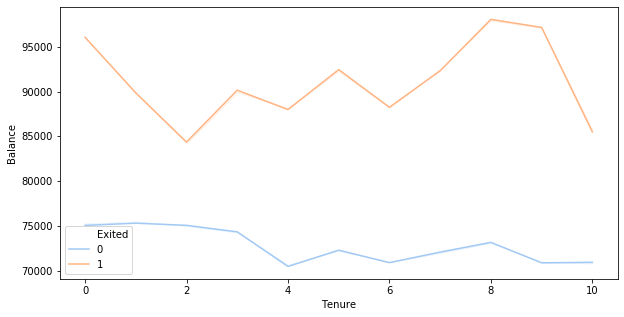

In [75]:
# Tenure, Balance dan Exited

plt.figure(figsize = (10, 5))
sns.lineplot(x = 'Tenure', y = 'Balance', hue = 'Exited', data = df_clean, palette = 'pastel', ci = False)

Hasil :
- Berdasarkan Saldo dan Durasi bergabung, nasabah yang churn lebih fluktuatif bila dibandingkan dengan nasabah yang loyal.

# Multivariat 4 features

In [76]:
# Balance group, Punya Kartu kredit/tidak, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['HasCrCard'], df_clean['EstimatedSalary_group'], df_clean['Exited']])

HasCrCard                              0                                       \
EstimatedSalary_group Penghasilan Rendah     Menengah     Menengah Keatas       
Exited                                 0   1        0   1               0   1   
Balance_group                                                                   
0-50000                                2   0        3   2               2   0   
50001-100000                          90  23       93  29              98  24   
100001-150000                        195  63      223  64             224  71   
150001-200000                         60  19       44  13              61  19   
200000 Plus                            1   1        2   4               2   3   

HasCrCard                                         1                     \
EstimatedSalary_group Tinggi     Penghasilan Rendah      Menengah        
Exited                     0   1                  0    1        0    1   
Balance_group                                                            
0-50000                    3   4                  9    4       12    6   
50001-100000              95  28                203   36      212   49   
100001-150000            214  77                454  184      513  178   
150001-200000             42  19                130   29      134   32   
200000 Plus                1   2                  0    2        2    1   

HasCrCard                                               
EstimatedSalary_group Menengah Keatas      Tinggi       
Exited                              0    1      0    1  
Balance_group                                           
0-50000                             9    6      9    4  
50001-100000                      227   57    191   54  
100001-150000                     526  179    494  171  
150001-200000                     127   38    132   36  
200000 Plus                         5    2      2    4

Hasil :
    
- Nasabah keluar terbanyak sejumlah 184 yang merupakan nasabah dengan kartu kredit, penghasilan rendah dan saldo di bank antara 100000-150000.

- Sedangkan nasabah yang loyal terbanyak (526 nasabah) berasal dari nasabah dengan penghasilan menengah keatas, memiliki kartu kredit dan saldo antara 100,000 hingga 150,000 euro.

In [77]:
# Balance group, gender, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['Gender'], df_clean['EstimatedSalary_group'], df_clean['Exited']])

Gender                            Female                                     \
EstimatedSalary_group Penghasilan Rendah      Menengah      Menengah Keatas   
Exited                                 0    1        0    1               0   
Balance_group                                                                 
0-50000                                7    3        6    7               5   
50001-100000                         116   39      139   40             146   
100001-150000                        278  129      291  124             332   
150001-200000                         81   20       71   23              71   
200000 Plus                            1    1        3    3               2   

Gender                                               Male                     \
EstimatedSalary_group      Tinggi      Penghasilan Rendah      Menengah        
Exited                   1      0    1                  0    1        0    1   
Balance_group                                                                  
0-50000                  5      5    5                  4    1        9    1   
50001-100000            46    121   51                177   20      166   38   
100001-150000          142    290  138                371  118      445  118   
150001-200000           37     75   30                109   28      107   22   
200000 Plus              3      0    3                  0    2        1    2   

Gender                                                  
EstimatedSalary_group Menengah Keatas      Tinggi       
Exited                              0    1      0    1  
Balance_group                                           
0-50000                             6    1      7    3  
50001-100000                      179   35    165   31  
100001-150000                     418  108    418  110  
150001-200000                     117   20     99   25  
200000 Plus                         5    2      3    3

Hasil :
- Nasabah wanita, berpenghasilan menengah keatas dan memiliki saldo antara 100,000-150,000 memiliki tingkat churn tertinggi, yaitu sebanyak 142 nasabah.


In [78]:
# Balance group, grup usia, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['Age_group'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                              0-50000  50001-100000  \
Age_group    EstimatedSalary_group Exited                          
Gen Z        Penghasilan Rendah    0             1             4   
             Menengah              0             0             1   
             Menengah Keatas       0             0             3   
                                   1             0             1   
             Tinggi                0             0             7   
                                   1             0             0   
Millenials   Penghasilan Rendah    0             6           158   
                                   1             1            11   
             Menengah              0             5           160   
                                   1             1            15   
             Menengah Keatas       0             4           188   
                                   1             3            11   
             Tinggi                0             7           167   
                                   1             1            18   
Gen X        Penghasilan Rendah    0             3           103   
                                   1             2            34   
             Menengah              0            10           118   
                                   1             3            46   
             Menengah Keatas       0             5           107   
                                   1             3            58   
             Tinggi                0             5            99   
                                   1             6            49   
Baby Boomers Penghasilan Rendah    0             1            26   
                                   1             1            14   
             Menengah              0             0            25   
                                   1             4            17   
             Menengah Keatas       0             2            26   
                                   1             0            11   
             Tinggi                0             0            13   
                                   1             1            15   

Balance_group                              100001-150000  150001-200000  \
Age_group    EstimatedSalary_group Exited                                 
Gen Z        Penghasilan Rendah    0                  13              4   
             Menengah              0                   8              1   
             Menengah Keatas       0                   7              2   
                                   1                   2              0   
             Tinggi                0                   9              5   
                                   1                   1              1   
Millenials   Penghasilan Rendah    0                 377            109   
                                   1                  52             10   
             Menengah              0                 402            109   
                                   1                  62             12   
             Menengah Keatas       0                 435            102   
                                   1                  56             18   
             Tinggi                0                 402             92   
                                   1                  54             13   
Gen X        Penghasilan Rendah    0                 210             64   
                                   1                 148             30   
             Menengah              0                 269             58   
                                   1                 132             27   
             Menengah Keatas       0                 249             69   
                                   1                 139             27   
             Tinggi                0                 251             64   
                                   1                 154             28   
Baby Boomers Penghasila

Hasil :
- 154 nasabah churn berasal dari generasi X, berpenghasilan tinggi dan saldo 100,000-150,000.

In [79]:
# Balance group, grup CreditScore, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['CreditScore_group'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                                   0-50000  50001-100000  \
CreditScore_group EstimatedSalary_group Exited                          
Poor Credit Score Penghasilan Rendah    0             1            58   
                                        1             1            11   
                  Menengah              0             3            69   
                                        1             2            17   
                  Menengah Keatas       0             0            80   
                                        1             1            22   
                  Tinggi                0             2            54   
                                        1             3            25   
Fair              Penghasilan Rendah    0             6           108   
                                        1             2            22   
                  Menengah              0             4           101   
                                        1             4            20   
                  Menengah Keatas       0             6           107   
                                        1             2            31   
                  Tinggi                0             3           100   
                                        1             3            24   
Good              Penghasilan Rendah    0             1            77   
                                        1             1            18   
                  Menengah              0             8            72   
                                        1             2            19   
                  Menengah Keatas       0             3            73   
                                        1             2            17   
                  Tinggi                0             4            75   
                                        1             0            20   
Very Good         Penghasilan Rendah    0             0            36   
                                        1             0             2   
                  Menengah              0             0            48   
                                        1             0            14   
                  Menengah Keatas       0             1            41   
                                        1             1             6   
                  Tinggi                0             2            32   
                                        1             2             7   
Exceptional       Penghasilan Rendah    0             3            14   
                                        1             0             6   
                  Menengah              0             0            15   
                                        1             0             8   
                  Menengah Keatas       0             1            24   
                                        1             0             5   
                  Tinggi                0             1            25   
                                        1             0             6   

Balance_group                                   100001-150000  150001-200000  \
CreditScore_group EstimatedSalary_group Exited                                 
Poor Credit Score Penghasilan Rendah    0                 139             40   
                                        1                  63             11   
                  Menengah              0                 177             37   
                                        1                  66              9   
                  Menengah Keatas       0                 183             34   
                                        1                  66             18   
                  Tinggi                0                 159             50   
                                        1                  63             15   
Fair              Penghasilan Rendah    0                 240             63   
                                        1            

Hasil :
- Sebanyak 92 nasabah bank churn dengan kredit skor kategori Fair, berpenghasilan menengah keatas dan saldo 100,000-150,000.

In [80]:
# Balance group, IsActiveMember, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['IsActiveMember'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                                0-50000  50001-100000  \
IsActiveMember EstimatedSalary_group Exited                          
0              Penghasilan Rendah    0             5           125   
                                     1             3            39   
               Menengah              0             5           131   
                                     1             5            50   
               Menengah Keatas       0             3           136   
                                     1             5            50   
               Tinggi                0             4           130   
                                     1             5            53   
1              Penghasilan Rendah    0             6           168   
                                     1             1            20   
               Menengah              0            10           174   
                                     1             3            28   
               Menengah Keatas       0             8           189   
                                     1             1            31   
               Tinggi                0             8           156   
                                     1             3            29   

Balance_group                                100001-150000  150001-200000  \
IsActiveMember EstimatedSalary_group Exited                                 
0              Penghasilan Rendah    0                 281             84   
                                     1                 148             33   
               Menengah              0                 326             84   
                                     1                 164             32   
               Menengah Keatas       0                 333             80   
                                     1                 152             38   
               Tinggi                0                 305             80   
                                     1                 163             34   
1              Penghasilan Rendah    0                 368            106   
                                     1                  99             15   
               Menengah              0                 410             94   
                                     1                  78             13   
               Menengah Keatas       0                 417            108   
                                     1                  98             19   
               Tinggi                0                 403             94   
                                     1                  85             21   

Balance_group                                200000 Plus  
IsActiveMember EstimatedSalary_group Exited               
0              Penghasilan Rendah    0                 1  
                                     1                 0  
               Menengah              0                 3  
                                     1                 2  
               Menengah Keatas       0                 4  
                                     1                 2  
               Tinggi                0                 3  
                                     1                 4  
1              Penghasilan Rendah    0                 0  
                                     1                 3  
               Menengah              0                 1  
                                     1                 3  
               Menengah Keatas       0                 3  
                                     1                 3  
               Tinggi                0                 0  
                                     1                 2

Hasil :
- Nasabah churn terbanyak ada 164 dengan kriteria nasabah tidak aktif, berpenghasilan menengah, dan saldo 100,000 - 150,000. 

In [81]:
# Balance group, Geography, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['Geography'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                           0-50000  50001-100000  100001-150000  \
Geography EstimatedSalary_group Exited                                         
France    Penghasilan Rendah    0             5           130            278   
                                1             4            22             53   
          Menengah              0             6           139            325   
                                1             5            30             64   
          Menengah Keatas       0             7           148            324   
                                1             4            23             57   
          Tinggi                0             3           120            311   
                                1             7            35             64   
Germany   Penghasilan Rendah    0             5           109            215   
                                1             0            22            174   
          Menengah              0             5            88            268   
                                1             0            27            153   
          Menengah Keatas       0             4           105            267   
                                1             0            33            164   
          Tinggi                0             5           114            256   
                                1             0            26            155   
Spain     Penghasilan Rendah    0             1            54            156   
                                1             0            15             20   
          Menengah              0             4            78            143   
                                1             3            21             25   
          Menengah Keatas       0             0            72            159   
                                1             2            25             29   
          Tinggi                0             4            52            141   
                                1             1            21             29   

Balance_group                           150001-200000  200000 Plus  
Geography EstimatedSalary_group Exited                              
France    Penghasilan Rendah    0                  86            1  
                                1                  21            2  
          Menengah              0                  83            2  
                                1                  21            2  
          Menengah Keatas       0                  80            1  
                                1                  29            3  
          Tinggi                0                  72            2  
                                1                  24            3  
Germany   Penghasilan Rendah    0                  58            0  
                                1                  16            0  
          Menengah              0                  57            2  
                                1                  16            0  
          Menengah Keatas       0                  67            4  
                                1                  13            0  
          Tinggi                0                  66            0  
                                1                  15            0  
Spain     Penghasilan Rendah    0                  46            0  
                                1                  11            1  
          Menengah              0                  38            0  
                                1                   8            3  
          Menengah Keatas       0                  41            2  
                                1                  15            2  
          Tinggi                0                  36            1  
                                1                  16            3

Hasil :
- Nasabah dari Perancis :
    - Masing-masing sebanyak 64 nasabah berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah dari Jerman :
    - 174 nasabah churn berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah dari Spanyol :
    - Masing-masing sebanyak 29 nasabah berpenghasilan menengah keatas dan tinggi dengan saldo berkisar 100,000-150,000.

In [82]:
# Balance group, NumOfProducts, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['NumOfProducts'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                               0-50000  50001-100000  \
NumOfProducts EstimatedSalary_group Exited                          
1             Penghasilan Rendah    0             6           190   
                                    1             3            44   
              Menengah              0            10           195   
                                    1             4            50   
              Menengah Keatas       0            10           209   
                                    1             5            55   
              Tinggi                0             6           175   
                                    1             5            55   
2             Penghasilan Rendah    0             5           103   
                                    1             0             8   
              Menengah              0             5           110   
                                    1             2            18   
              Menengah Keatas       0             0           116   
                                    1             0            15   
              Tinggi                0             6           110   
                                    1             2            16   
3             Penghasilan Rendah    0             0             0   
                                    1             0             7   
              Menengah              0             0             0   
                                    1             2            10   
              Menengah Keatas       0             1             0   
                                    1             1             7   
              Tinggi                0             0             1   
                                    1             1             9   
4             Penghasilan Rendah    1             1             0   
              Menengah              1             0             0   
              Menengah Keatas       1             0             4   
              Tinggi                1             0             2   

Balance_group                               100001-150000  150001-200000  \
NumOfProducts EstimatedSalary_group Exited                                 
1             Penghasilan Rendah    0                 427            128   
                                    1                 187             28   
              Menengah              0                 480            110   
                                    1                 167             36   
              Menengah Keatas       0                 486            113   
                                    1                 167             36   
              Tinggi                0                 446            107   
                                    1                 177             38   
2             Penghasilan Rendah    0                 221             62   
                                    1                  33             11   
              Menengah              0                 255             67   
                                    1                  43              8   
              Menengah Keatas       0                 263             75   
                                    1                  43             11   
              Tinggi                0                 259             66   
                                    1                  40              8   
3             Penghasilan Rendah    0                   1              0   
                                    1                  18              7   
              Menengah              0                   1              1   
                                    1                  24              1   
              Menengah Keatas       0                   1              0   
                                    1                  30              6   
              Tinggi                0                   3              1   
                             

Hasil :
- 187 nasabah berpindah bank dengan satu produk bank, berpenghasilan rendah dan saldo 100,000-150,000.

Hasil All :
- Nasabah keluar merupakan nasabah dengan kartu kredit, penghasilan rendah dan saldo di bank antara 100000-150000.
- Nasabah wanita, berpenghasilan menengah keatas dan memiliki saldo antara 100,000-150,000 memiliki tingkat churn tertinggi, yaitu sebanyak 142 nasabah.
- Nasabah churn berasal dari generasi X, berpenghasilan tinggi dan saldo 100,000-150,000.
- Sebanyak 92 nasabah bank churn dengan kredit skor kategori Fair, berpenghasilan menengah keatas dan saldo 100,000-150,000.
- Nasabah churn terbanyak ada 164 dengan kriteria nasabah tidak aktif, berpenghasilan menengah, dan saldo 100,000 - 150,000.
- Nasabah dari Perancis :
    - Masing-masing sebanyak 64 nasabah berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah dari Jerman :
    - 174 nasabah churn berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah dari Spanyol :
    - Masing-masing sebanyak 29 nasabah berpenghasilan menengah keatas dan tinggi dengan saldo berkisar 100,000-150,000.
- 187 nasabah berpindah bank dengan satu produk bank, berpenghasilan rendah dan saldo 100,000-150,000.

# Multivariat 5 Features

In [83]:
# Balance group, Gender, Grup Usia, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['Gender'], df_clean['Age_group'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                                     0-50000  50001-100000  \
Gender Age_group    EstimatedSalary_group Exited                          
Female Gen Z        Penghasilan Rendah    0             1             2   
                    Menengah              0             0             0   
                    Menengah Keatas       0             0             2   
                                          1             0             1   
                    Tinggi                0             0             4   
                                          1             0             0   
       Millenials   Penghasilan Rendah    0             5            68   
                                          1             1            10   
                    Menengah              0             2            74   
                                          1             1             7   
                    Menengah Keatas       0             2            82   
                                          1             3             6   
                    Tinggi                0             4            71   
                                          1             0            11   
       Gen X        Penghasilan Rendah    0             1            34   
                                          1             2            21   
                    Menengah              0             4            58   
                                          1             3            26   
                    Menengah Keatas       0             2            53   
                                          1             2            32   
                    Tinggi                0             1            41   
                                          1             5            27   
       Baby Boomers Penghasilan Rendah    0             0            11   
                                          1             0             8   
                    Menengah              0             0             6   
                                          1             3             7   
                    Menengah Keatas       0             1             8   
                                          1             0             7   
                    Tinggi                0             0             5   
                                          1             0            13   
Male   Gen Z        Penghasilan Rendah    0             0             2   
                    Menengah              0             0             1   
                    Menengah Keatas       0             0             1   
                    Tinggi                0             0             3   
                                          1             0             0   
       Millenials   Penghasilan Rendah    0             1            90   
                                          1             0             1   
                    Menengah              0             3            86   
                                          1             0             8   
                    Menengah Keatas       0             2           106   
                                          1             0             5   
                    Tinggi                0             3            96   
                                          1             1             7   
       Gen X        Penghasilan Rendah    0             2            69   
                                          1             0            13   
                    Menengah              0             6            60   
                                          1             0            20   
                    Menengah Keatas       0             3            54   
                                          1             1            26   
                    Tinggi                0             4            58   
                                          1             1            22   
       Baby Boomers Pengh

Hasil :
- Nasabah churn terbanyak ada 84 nasabah wanita dari generasi X, berpenghasilan tinggi dan saldo bank 100,000-150,000.

In [84]:
# Balance group, HasCrCard, Grup Usia, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['HasCrCard'], df_clean['Age_group'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                                        0-50000  50001-100000  \
HasCrCard Age_group    EstimatedSalary_group Exited                          
0         Gen Z        Penghasilan Rendah    0             0             3   
                       Menengah              0             0             1   
                       Menengah Keatas       0             0             0   
                                             1             0             0   
                       Tinggi                0             0             0   
                                             1             0             0   
          Millenials   Penghasilan Rendah    0             1            44   
                                             1             0             4   
                       Menengah              0             1            53   
                                             1             0             4   
                       Menengah Keatas       0             2            50   
                                             1             0             2   
                       Tinggi                0             3            65   
                                             1             0             9   
          Gen X        Penghasilan Rendah    0             0            34   
                                             1             0            14   
                       Menengah              0             2            32   
                                             1             0            20   
                       Menengah Keatas       0             0            38   
                                             1             0            18   
                       Tinggi                0             0            28   
                                             1             4            16   
          Baby Boomers Penghasilan Rendah    0             1             8   
                                             1             0             5   
                       Menengah              0             0             7   
                                             1             2             5   
                       Menengah Keatas       0             0            10   
                                             1             0             4   
                       Tinggi                0             0             2   
                                             1             0             3   
1         Gen Z        Penghasilan Rendah    0             1             1   
                       Menengah              0             0             0   
                       Menengah Keatas       0             0             3   
                                             1             0             1   
                       Tinggi                0             0             7   
                                             1             0             0   
          Millenials   Penghasilan Rendah    0             5           114   
                                             1             1             7   
                       Menengah              0             4           107   
                                             1             1            11   
                       Menengah Keatas       0             2           138   
                                             1             3             9   
                       Tinggi                0             4           102   
                                             1             1             9   
          Gen X        Penghasilan Rendah    0             3            69   
                                             1             2            20   
                       Menengah              0             8            86   
                                             1             3            26   
                       Menengah Keatas       0             5            69   
                      

Hasil :
- 114 nasabah churn berasal dari nasabah yang memiliki kartu kredit, usia generasi X dan berpenghasilan rendah.

In [85]:
# Balance group, IsActiveMember, Grup Usia, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = df_clean['Balance_group'], columns = [df_clean['IsActiveMember'], df_clean['Age_group'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Balance_group                                             0-50000  \
IsActiveMember Age_group    EstimatedSalary_group Exited            
0              Gen Z        Penghasilan Rendah    0             1   
                            Menengah              0             0   
                            Menengah Keatas       0             0   
                                                  1             0   
                            Tinggi                0             0   
                                                  1             0   
               Millenials   Penghasilan Rendah    0             2   
                                                  1             1   
                            Menengah              0             2   
                                                  1             1   
                            Menengah Keatas       0             0   
                                                  1             3   
                            Tinggi                0             2   
                                                  1             0   
               Gen X        Penghasilan Rendah    0             2   
                                                  1             1   
                            Menengah              0             3   
                                                  1             2   
                            Menengah Keatas       0             3   
                                                  1             2   
                            Tinggi                0             2   
                                                  1             4   
               Baby Boomers Penghasilan Rendah    0             0   
                                                  1             1   
                            Menengah              0             0   
                                                  1             2   
                            Menengah Keatas       0             0   
                                                  1             0   
                            Tinggi                0             0   
                                                  1             1   
1              Gen Z        Penghasilan Rendah    0             0   
                            Menengah              0             0   
                            Menengah Keatas       0             0   
                                                  1             0   
                            Tinggi                0             0   
                                                  1             0   
               Millenials   Penghasilan Rendah    0             4   
                                                  1             0   
                            Menengah              0             3   
                                                  1             0   
                            Menengah Keatas       0             4   
                                                  1             0   
                            Tinggi                0             5   
                                                  1             1   
               Gen X        Penghasilan Rendah    0             1   
                                                  1             1   
                            Menengah              0             7   
                                                  1             1   
                            Menengah Keatas       0             2   
                                                  1             1   
                            Tinggi                0             3   
                                                  1             2   
               Baby Boomers Penghasilan Rendah    0             1   
                                                  1             0   
                            Menengah              0             0   
                                                  1             2  

Hasil :
- 103 nasabah churn dari member yang tidak aktif, generasi X, berpenghasilan tinggi dan saldo 100,000-150,000.

Hasil All :
- Nasabah churn terbanyak ada 84 nasabah wanita dari generasi X, berpenghasilan tinggi dan saldo bank 100,000-150,000.
- 114 nasabah churn berasal dari nasabah yang memiliki kartu kredit, usia generasi X dan berpenghasilan rendah.
- 103 nasabah churn dari member yang tidak aktif, generasi X, berpenghasilan tinggi dan saldo 100,000-150,000.

## 6 features

In [86]:
# Gender, Balance group, IsActiveMember, Grup Usia, Estimasi tingkat penghasilan dan Exited

pd.crosstab(index = [df_clean['Gender'],df_clean['Balance_group']], columns = [df_clean['IsActiveMember'], df_clean['Age_group'], df_clean['EstimatedSalary_group'], df_clean['Exited']]).T

Gender                                                    Female               \
Balance_group                                            0-50000 50001-100000   
IsActiveMember Age_group    EstimatedSalary_group Exited                        
0              Gen Z        Penghasilan Rendah    0            1            1   
                            Menengah              0            0            0   
                            Menengah Keatas       0            0            1   
                                                  1            0            0   
                            Tinggi                0            0            2   
                                                  1            0            0   
               Millenials   Penghasilan Rendah    0            2           33   
                                                  1            1            6   
                            Menengah              0            1           34   
                                                  1            1            5   
                            Menengah Keatas       0            0           42   
                                                  1            3            4   
                            Tinggi                0            1           29   
                                                  1            0            4   
               Gen X        Penghasilan Rendah    0            1           15   
                                                  1            1           13   
                            Menengah              0            1           31   
                                                  1            2           15   
                            Menengah Keatas       0            0           20   
                                                  1            1           23   
                            Tinggi                0            1           24   
                                                  1            4           20   
               Baby Boomers Penghasilan Rendah    0            0            0   
                                                  1            0            8   
                            Menengah              0            0            0   
                                                  1            1            4   
                            Menengah Keatas       0            0            0   
                                                  1            0            4   
                            Tinggi                0            0            1   
                                                  1            0            8   
1              Gen Z        Penghasilan Rendah    0            0            1   
                            Menengah              0            0            0   
                            Menengah Keatas       0            0            1   
                                                  1            0            1   
                            Tinggi                0            0            2   
                                                  1            0            0   
               Millenials   Penghasilan Rendah    0            3           35   
                                                  1            0            4   
                            Menengah              0            1           40   
                                                  1            0            2   
                            Menengah Keatas       0            2           40   
                                                  1            0            2   
                            Tinggi                0            3           42   
                                                  1            0            7   
               Gen X        Penghasilan Rendah    0            0           19   
                                                  1            1            8   
                            Men

Hasil :
- 55 nasabah churn dengan jenis kelamin wanita, generasi X, bukan member aktif, berpenghasilan tinggi dan saldo 100,000-150,000.


Hasil ALL :

#### 4 features
- Nasabah keluar merupakan nasabah dengan kartu kredit, penghasilan rendah dan saldo di bank antara 100000-150000.
- Nasabah wanita, berpenghasilan menengah keatas dan memiliki saldo antara 100,000-150,000 memiliki tingkat churn tertinggi, yaitu sebanyak 142 nasabah.
- Nasabah churn berasal dari generasi X, berpenghasilan tinggi dan saldo 100,000-150,000.
- Sebanyak 92 nasabah bank churn dengan kredit skor kategori Fair, berpenghasilan menengah keatas dan saldo 100,000-150,000.
- Nasabah churn terbanyak ada 164 dengan kriteria nasabah tidak aktif, berpenghasilan menengah, dan saldo 100,000 - 150,000.
- Nasabah dari Perancis :
    - Masing-masing sebanyak 64 nasabah berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah dari Jerman :
    - 174 nasabah churn berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah dari Spanyol :
    - Masing-masing sebanyak 29 nasabah berpenghasilan menengah keatas dan tinggi dengan saldo berkisar 100,000-150,000.
- 187 nasabah berpindah bank dengan satu produk bank, berpenghasilan rendah dan saldo 100,000-150,000.

#### 5 features
- Nasabah churn terbanyak ada 84 nasabah wanita dari generasi X, berpenghasilan tinggi dan saldo bank 100,000-150,000.
- 114 nasabah churn berasal dari nasabah yang memiliki kartu kredit, usia generasi X dan berpenghasilan rendah.
- 103 nasabah churn dari member yang tidak aktif, generasi X, berpenghasilan tinggi dan saldo 100,000-150,000.

#### 6 features
- 55 nasabah churn dengan jenis kelamin wanita, generasi X, bukan member aktif, berpenghasilan tinggi dan saldo 100,000-150,000.

# Kesimpulan

- Menyelidiki jenis kelamin, pendapatan, usia dan kewarganegaraan sebagai variabel demografis pelanggan. Hasil penelitian ini sejalan dengan penelitian Buckinx dan Van den Poel (2005) dan Clemes et al. (2010) yang membuat daftar variabel demografis terkait pelanggan (misalnya, usia, pendidikan, budaya, dan kewarganegaraan).
- Dengan menjual produk tambahan kepada nasabah yang kita kaitkan dengan mereka, sehingga meningkatkan loyalitas mereka (kita telah melihat bahwa nasabah yang lebih loyal adalah mereka yang menggunakan minimal dua produk bank).
- Korelasi terbalik antara features IsActiveMember, NumOfProducts, CreditScore, Tenure dan HasCrCard dengan Exited
- Korelasi searah antara features EstimatedSalary, Balance dan Age dengan Exited

- Berdasarkan Demografis Nasabah :
    - Umur 30 tahunan atau yang berada pada Generasi X (38-53 tahun) cenderung churn.
    - Nasabah pria dan wanita dengan median usia 45 tahun akan berpindah bank.
    - Nasabah dari negara Perancis dan Jerman cenderung tidak loyal dan akan mencari bank lain.
    - Nasabah wanita dari negara Perancis memiliki tingkat churn paling besar.
    - Lebih banyak nasabah wanita (11,4%) yang berpindah ke bank lain daripada pria.
    - Nasabah dengan penghasilan menengah keatas akan memilih meninggalkan bank

- Nasabah yang :
    - Sudah bergabung bersama bank dalam durasi waktu satu hingga sembilan tahun, akan berpindah.
    - Memiliki kartu kredit akan keluar.
    - Memiliki saldo (balance) dibank sekitar 100,000 hingga 150,000 euro cenderung berpindah bank.

- Jumlah produk yang digunakan nasabah paling banyak adalah satu hingga dua produk. 
    - Jika nasabah memiliki 3 produk :  82.7% akan berpindah.
    - Tetapi, tidak ada nasabah yang menetap jika memiliki hingga 4 produk.
    
>
- Nasabah dengan ‘Poor’ dan ‘Fair’ skor kredit memiliki tingkat churn paling tinggi.
- 58% nasabah wanita dari setiap grup skor kredit 'Fair' dan 'Very Good' berpindah bank.
- Untuk nasabah laki-laki dengan skor kredit rendah (poor), 48% akan berpindah bank.
>
- Ada 2.037 nasabah dengan rata-rata umur 39 tahun dan rata-rata saldo 76,846 euro yang churn.
- Berdasarkan Saldo dan Durasi bergabung, nasabah yang churn lebih fluktuatif bila dibandingkan dengan nasabah yang loyal.
- Nasabah keluar terbanyak sejumlah 184 yang merupakan nasabah dengan kartu kredit, penghasilan rendah dan saldo di bank antara 100,000-150,000.
>
- Nasabah churn dari Jerman, berpenghasilan menengah dan Tinggi dengan saldo berkisar 100,000-150,000.
- Nasabah berpindah bank dengan satu produk bank, berpenghasilan rendah dan saldo 100,000-150,000.
- Nasabah churn berasal dari nasabah yang memiliki kartu kredit, usia generasi X dan berpenghasilan rendah.
- Nasabah churn dengan jenis kelamin wanita, generasi X, bukan member aktif, berpenghasilan tinggi dan saldo 100,000-150,000.

# Rekomendasi

1. Bank diharapkan tidak menawarkan produk lain kepada nasabah yang sudah memiliki 2 produk.
    - Karena apabila nasabah memiliki produk bank lebih dari 2, maka nasabah akan pindah ke bank lain.
    - Tidak ada nasabah yang tetap jika memiliki 4 produk.
2. Bank harus meningkatkan Customer Relation Management dengan nasabah.
    - Perbanyak interaksi dengan nasabah Pria, karena mereka cenderung tidak berpindah bank. 
    - Rata-rata saldo nasabah churn lebih tinggi dari rata-rata saldo nasabah yang retained.
    - Diharapkan bank tidak kehilangan nasabah penting yang memiliki jumlah saldo tinggi di bank.
    - Berikan perhatian lebih kepada nasabah yang memiliki saldo (balance) sekitar 100,000 hingga 150,000 euro (cenderung tidak berpindah bank).
3. Pentingnya menyediakan seluruh rangkaian produk keuangan sehingga nasabah dapat memenuhi semua kebutuhan finansialnya dalam satu penyedia layanan yang sama. Selain itu, pelanggan dan bank dapat membangun hubungan yang berharga melalui produk dan layanan yang memuaskan kebutuhan pelanggan dan memperkuat posisi pasar perusahaan di masa depan.
4. Bank dapat meningkatkan pemasarannya dengan memfokuskan upaya dalam persuasi agar nasabah tetap berada di bank untuk klien demografis tertentu terutama nasabah wanita, kewarganegaraan Jerman dan Prancis.
